In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Implementacao do Strip Tree
## Caso - Função quadrática

In [2]:
theta = np.linspace(0, 2*np.pi, 20)
r = np.sqrt(1.0)
x = r*np.cos(theta)
y = r*np.sin(theta)
len(theta)

20

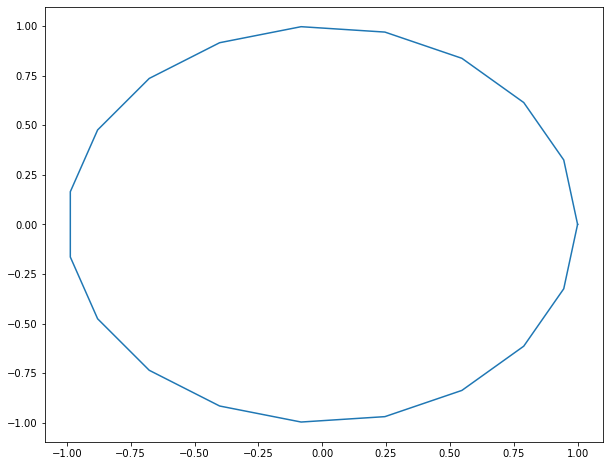

In [3]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.savefig('../fig/Strip_Tree/circ01',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [4]:
x00 = min(x);y00 = max(y)
x01 = max(x);y01 = min(y)

In [5]:
#rectangulo
def rectangulo(x00,x01,y00,y01):
    xleft = [x00,x00]
    yleft = [y00,y01]

    xright = [x01,x01]
    yright = [y00,y01]

    xtop = [x00,x01]
    ytop = [y01,y01]

    xbot = [x00,x01]
    ybot = [y00,y00]
    
    return xleft,yleft,xright,yright,xtop,ytop,xbot,ybot

In [6]:
def Strip_Tree(x,y):
    x1,y1 = x[0:2],y[0:2]
    x2,y2 = x[1:len(x)],y[1:len(y)]

    # Primera Mitad
    x1_min,x1_max = np.min(x1),np.max(x1)
    y1_min,y1_max = np.min(y1),np.max(y1)
    m1 = (y1[-1] - y1[0])/(x1[-1] - x1[0])

    if m1 >= 0:

        x1s = x1_min
        y1s = y1_min

        x1e = x1_max
        y1e = y1_max

        lon1 = math.sqrt( ((x1e-x1s)**2)+((y1e-y1s)**2) )   

    else:
        x1s = x1_min
        y1s = y1_max

        x1e = x1_max
        y1e = y1_min

        lon1 = math.sqrt( ((x1e-x1s)**2)+((y1e-y1s)**2) )   

    # Segunda Mitad
    x2_min,x2_max = np.min(x2),np.max(x2)
    y2_min,y2_max = np.min(y2),np.max(y2)
    x2_len = x2_max - x2_min
    y2_len = y2_max - y2_min

    x2s,x2e = x[1],x[len(x)-1]
    y2s,y2e = y[1],y[len(y)-1]

    m2 = (y2[-1] - y2[0])/(x2[-1] - x2[0])

    if m2 >= 0:

        x2s = x2[0]
        y2s = y2[0]

        x2e = x2_max
        y2e = y2_max

        lon2 = math.sqrt( ((x2e-x2s)**2)+((y2e-y2s)**2) )   

        wl = y2_max - y2s
        wr = y2s - np.min(y2)

    else:
        x2s = x2_min
        y2s = y2_max

        x2e = x2_max
        y2e = y2_min

        lon2 = math.sqrt( ((x2e-x2s)**2)+((y2e-y2s)**2) )   
        
        wl = y2_max - y2s
        wr = y2s - np.min(y2)
        
    print('wl: ',wl)
    print('wr: ',wr)
        
    return x1s,y1s,x1e,y1e,x2s,y2s,x2e,y2e,wl,wr,lon1,lon2

In [7]:
xleft1,yleft1,xright1,yright1,xtop1,ytop1,xbot1,ybot1 = rectangulo(x00,x01,y00,y01) 

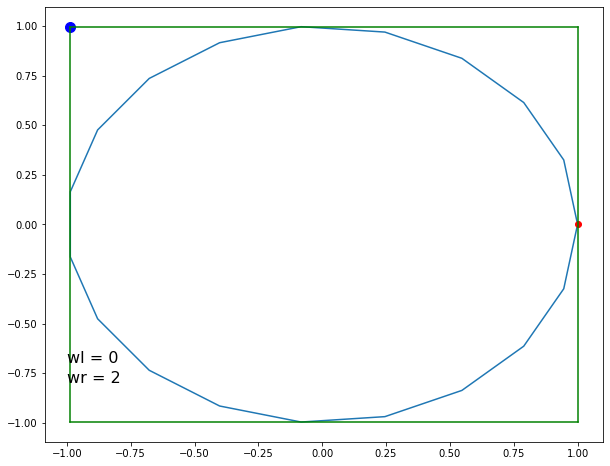

In [8]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)

plt.plot(x00,y00,'bo',markersize=10)
plt.plot(x01,y[-1],'ro')

plt.plot(xleft1,yleft1,'g')
plt.plot(xright1,yright1,'g')
plt.plot(xtop1,ytop1,'g')
plt.plot(xbot1,ybot1,'g')

plt.text(-1,-0.7,'wl = 0', fontsize=16)
plt.text(-1,-0.8,'wr = 2', fontsize=16)

plt.savefig('../fig/Strip_Tree/circ02',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [9]:
x1s,y1s,x1e,y1e,x2s,y2s,x2e,y2e,wl,wr,lon1,lon2 = Strip_Tree(x,y)
xleft2,yleft2,xright2,yright2,xtop2,ytop2,xbot2,ybot2 = rectangulo(x2s,x2e,y2s+wl,y2s-wr) 

wl:  0.0
wr:  1.9931689860133397


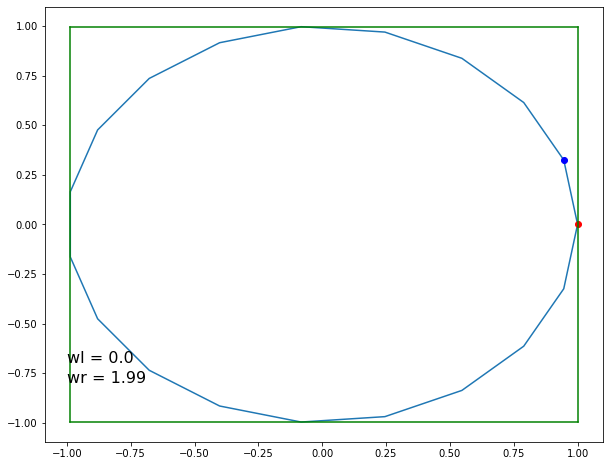

In [10]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x1s,y1s,'bo')
plt.plot(x1e,y1e,'ro')

plt.plot(xleft2,yleft2,'g')
plt.plot(xright2,yright2,'g')
plt.plot(xtop2,ytop2,'g')
plt.plot(xbot2,ybot2,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ03',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [11]:
x3s,y3s,x3e,y3e,x4s,y4s,x4e,y4e,wl,wr,lon3,lon4 = Strip_Tree(x[1:len(x)],y[1:len(x)])
xleft3,yleft3,xright3,yright3,xtop3,ytop3,xbot3,ybot3 = rectangulo(x4s,x4e,y4s+wl,y4s-wr) 

wl:  0.0
wr:  1.9931689860133397


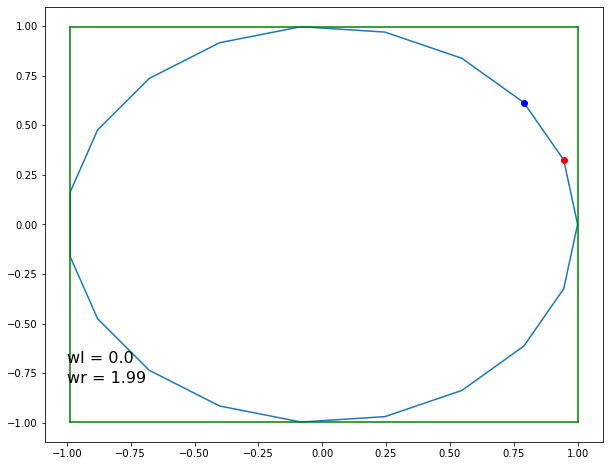

In [12]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x3s,y3s,'bo')
plt.plot(x3e,y3e,'ro')

plt.plot(xleft3,yleft3,'g')
plt.plot(xright3,yright3,'g')
plt.plot(xtop3,ytop3,'g')
plt.plot(xbot3,ybot3,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ04',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [13]:
x5s,y5s,x5e,y5e,x6s,y6s,x6e,y6e,wl,wr,lon5,lon6 = Strip_Tree(x[2:len(x)],y[2:len(x)])
xleft5,yleft5,xright5,yright5,xtop5,ytop5,xbot5,ybot5 = rectangulo(x6s,x6e,y6s+wl,y6s-wr) 

wl:  0.0
wr:  1.9931689860133397


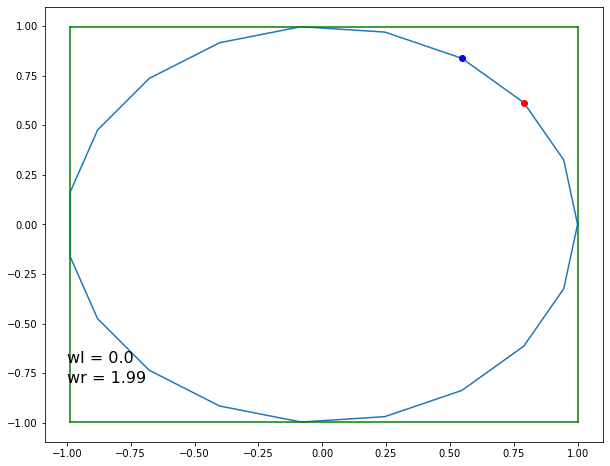

In [14]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x5s,y5s,'bo')
plt.plot(x5e,y5e,'ro')

plt.plot(xleft5,yleft5,'g')
plt.plot(xright5,yright5,'g')
plt.plot(xtop5,ytop5,'g')
plt.plot(xbot5,ybot5,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ05',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [15]:
x7s,y7s,x7e,y7e,x8s,y8s,x8e,y8e,wl,wr,lon7,lon8 = Strip_Tree(x[3:len(x)],y[3:len(x)])
xleft7,yleft7,xright7,yright7,xtop7,ytop7,xbot7,ybot7 = rectangulo(x8s,x8e,y8s+wl,y8s-wr) 

wl:  0.0
wr:  1.9931689860133397


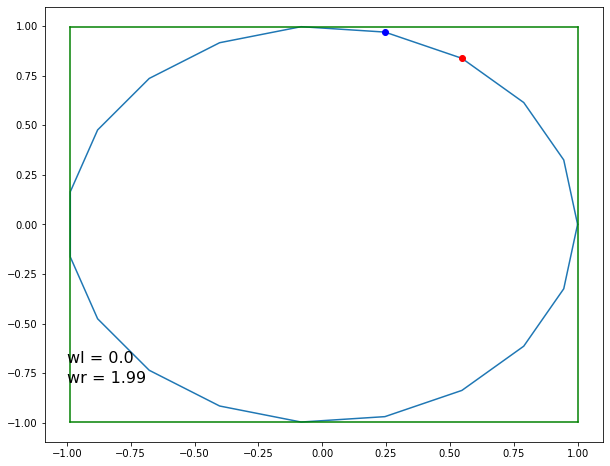

In [16]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x7s,y7s,'bo')
plt.plot(x7e,y7e,'ro')

plt.plot(xleft7,yleft7,'g')
plt.plot(xright7,yright7,'g')
plt.plot(xtop7,ytop7,'g')
plt.plot(xbot7,ybot7,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ06',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [17]:
x9s,y9s,x9e,y9e,x10s,y10s,x10e,y10e,wl,wr,lon9,lon10 = Strip_Tree(x[4:len(x)],y[4:len(x)])
xleft9,yleft9,xright9,yright9,xtop9,ytop9,xbot9,ybot9 = rectangulo(x10s,x10e,y10s+wl,y10s-wr) 

wl:  0.0
wr:  1.9931689860133397


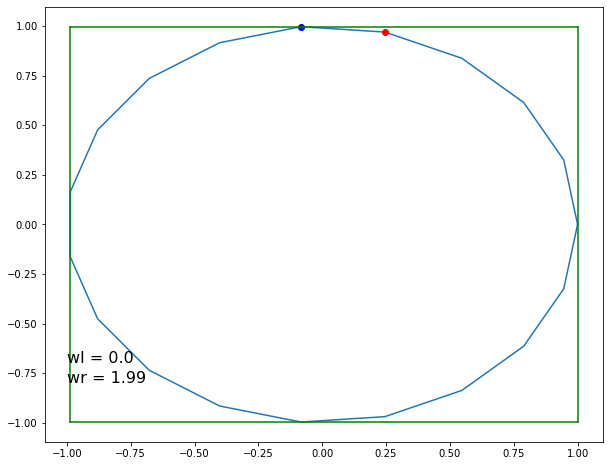

In [18]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x9s,y9s,'bo')
plt.plot(x9e,y9e,'ro')

plt.plot(xleft9,yleft9,'g')
plt.plot(xright9,yright9,'g')
plt.plot(xtop9,ytop9,'g')
plt.plot(xbot9,ybot9,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ07',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [19]:
x11s,y11s,x11e,y11e,x12s,y12s,x12e,y12e,wl,wr,lon11,lon12 = Strip_Tree(x[5:len(x)],y[5:len(x)])
xleft11,yleft11,xright11,yright11,xtop11,ytop11,xbot11,ybot11 = rectangulo(x12s,x12e,y12s+wl,y12s-wr) 

wl:  0.0
wr:  1.9123578196617275


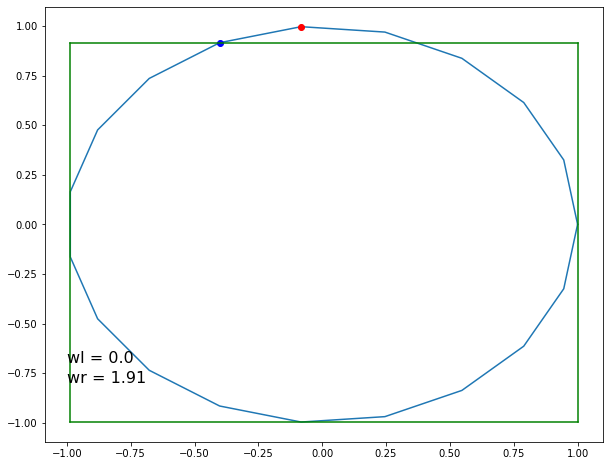

In [20]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x11s,y11s,'bo')
plt.plot(x11e,y11e,'ro')

plt.plot(xleft11,yleft11,'g')
plt.plot(xright11,yright11,'g')
plt.plot(xtop11,ytop11,'g')
plt.plot(xbot11,ybot11,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ08',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [21]:
x13s,y13s,x13e,y13e,x14s,y14s,x14e,y14e,wl,wr,lon13,lon14 = Strip_Tree(x[6:len(x)],y[6:len(x)])
xleft13,yleft13,xright13,yright13,xtop13,ytop13,xbot13,ybot13 = rectangulo(x14s,x14e,y14s+wl,y14s-wr) 

wl:  0.0
wr:  1.7323084036798018


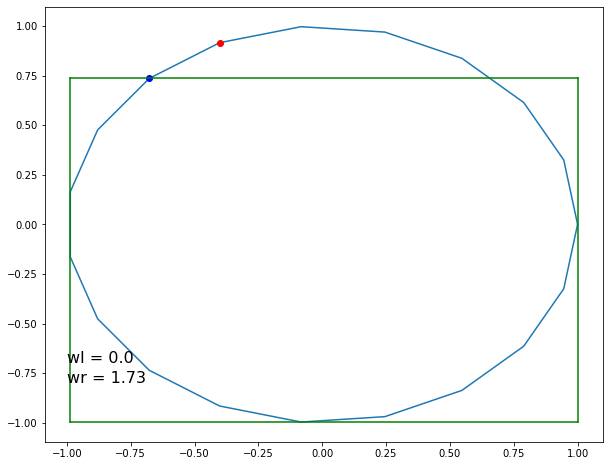

In [22]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x13s,y13s,'bo')
plt.plot(x13e,y13e,'ro')

plt.plot(xleft13,yleft13,'g')
plt.plot(xright13,yright13,'g')
plt.plot(xtop13,ytop13,'g')
plt.plot(xbot13,ybot13,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ09',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [23]:
x15s,y15s,x15e,y15e,x16s,y16s,x16e,y16e,wl,wr,lon15,lon16 = Strip_Tree(x[7:len(x)],y[7:len(x)])
xleft15,yleft15,xright15,yright15,xtop15,ytop15,xbot15,ybot15 = rectangulo(x16s,x16e,y16s+wl,y16s-wr) 

wl:  0.0
wr:  1.4725318860437435


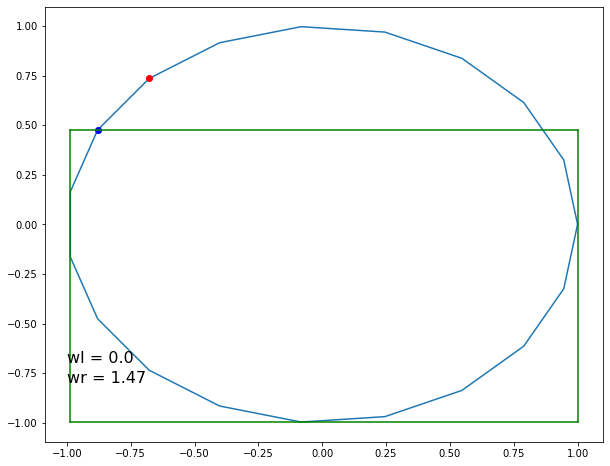

In [24]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x15s,y15s,'bo')
plt.plot(x15e,y15e,'ro')

plt.plot(xleft15,yleft15,'g')
plt.plot(xright15,yright15,'g')
plt.plot(xtop15,ytop15,'g')
plt.plot(xbot15,ybot15,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ10',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [25]:
x17s,y17s,x17e,y17e,x18s,y18s,x18e,y18e,wl,wr,lon17,lon18 = Strip_Tree(x[8:len(x)],y[8:len(x)])
xleft17,yleft17,xright17,yright17,xtop17,ytop17,xbot17,ybot17 = rectangulo(x18s,x18e,y18s+wl,y18s-wr) 

wl:  0.0
wr:  1.1611790832874038


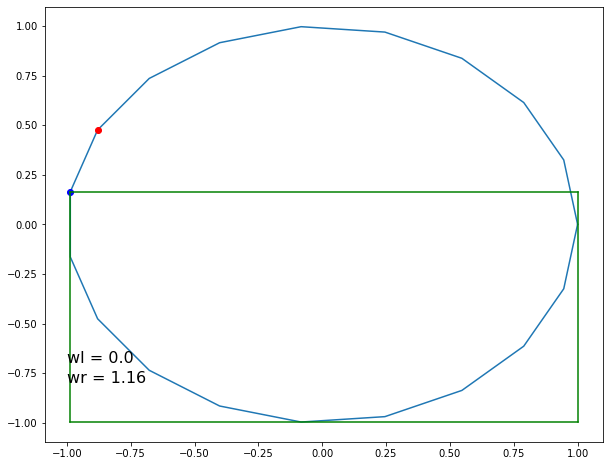

In [26]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x17s,y17s,'bo')
plt.plot(x17e,y17e,'ro')

plt.plot(xleft17,yleft17,'g')
plt.plot(xright17,yright17,'g')
plt.plot(xtop17,ytop17,'g')
plt.plot(xbot17,ybot17,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ11',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [27]:
x19s,y19s,x19e,y19e,x20s,y20s,x20e,y20e,wl,wr,lon19,lon20 = Strip_Tree(x[9:len(x)],y[9:len(x)])
xleft19,yleft19,xright19,yright19,xtop19,ytop19,xbot19,ybot19 = rectangulo(x20s,x20e,y20s+wl,y20s-wr) 

wl:  0.16459459028073353
wr:  0.8319899027259361


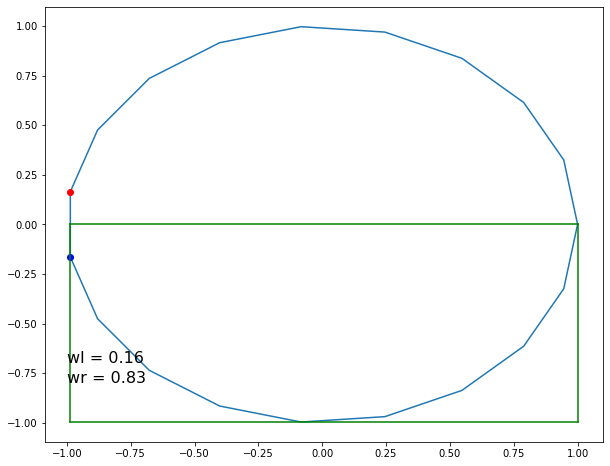

In [28]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x19s,y19s,'bo')
plt.plot(x19e,y19e,'ro')

plt.plot(xleft19,yleft19,'g')
plt.plot(xright19,yright19,'g')
plt.plot(xtop19,ytop19,'g')
plt.plot(xbot19,ybot19,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ12',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [29]:
x21s,y21s,x21e,y21e,x22s,y22s,x22e,y22e,wl,wr,lon21,lon22 = Strip_Tree(x[10:len(x)],y[10:len(x)])
xleft21,yleft21,xright21,yright21,xtop21,ytop21,xbot21,ybot21 = rectangulo(x22s,x22e,y22s+wl,y22s-wr) 

wl:  0.4759473930370733
wr:  0.5206370999695964


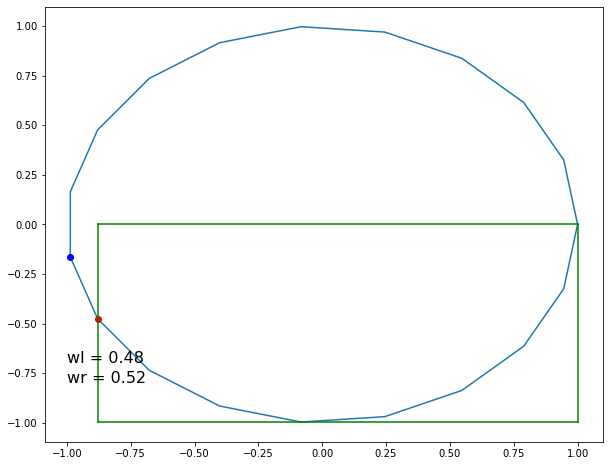

In [30]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x21s,y21s,'bo')
plt.plot(x21e,y21e,'ro')

plt.plot(xleft21,yleft21,'g')
plt.plot(xright21,yright21,'g')
plt.plot(xtop21,ytop21,'g')
plt.plot(xbot21,ybot21,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ13',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [31]:
x23s,y23s,x23e,y23e,x24s,y24s,x24e,y24e,wl,wr,lon23,lon24 = Strip_Tree(x[11:len(x)],y[11:len(x)])
xleft23,yleft23,xright23,yright23,xtop23,ytop23,xbot23,ybot23 = rectangulo(x24s,x24e,y24s+wl,y24s-wr) 

wl:  0.735723910673131
wr:  0.2608605823335386


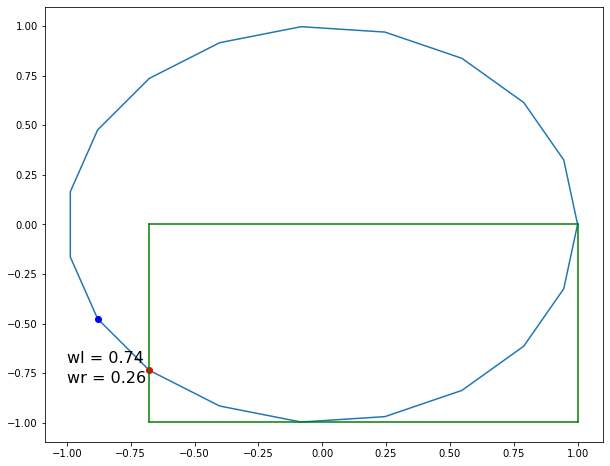

In [32]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x23s,y23s,'bo')
plt.plot(x23e,y23e,'ro')

plt.plot(xleft23,yleft23,'g')
plt.plot(xright23,yright23,'g')
plt.plot(xtop23,ytop23,'g')
plt.plot(xbot23,ybot23,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ14',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [33]:
x25s,y25s,x25e,y25e,x26s,y26s,x26e,y26e,wl,wr,lon25,lon26 = Strip_Tree(x[12:len(x)],y[12:len(x)])
xleft25,yleft25,xright25,yright25,xtop25,ytop25,xbot25,ybot25 = rectangulo(x26s,x26e,y26s+wl,y26s-wr) 

wl:  0.9157733266550571
wr:  0.08081116635161256


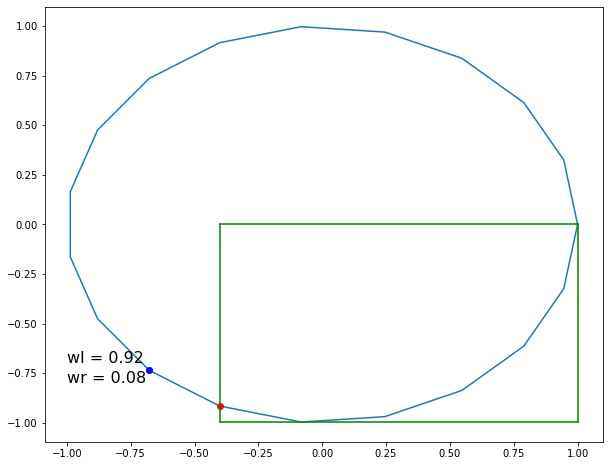

In [34]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x25s,y25s,'bo')
plt.plot(x25e,y25e,'ro')

plt.plot(xleft25,yleft25,'g')
plt.plot(xright25,yright25,'g')
plt.plot(xtop25,ytop25,'g')
plt.plot(xbot25,ybot25,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ15',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [35]:
x27s,y27s,x27e,y27e,x28s,y28s,x28e,y28e,wl,wr,lon27,lon28 = Strip_Tree(x[13:len(x)],y[13:len(x)])
xleft27,yleft27,xright27,yright27,xtop27,ytop27,xbot27,ybot27 = rectangulo(x28s,x28e,y28s+wl,y28s-wr) 

wl:  0.9965844930066696
wr:  0.0


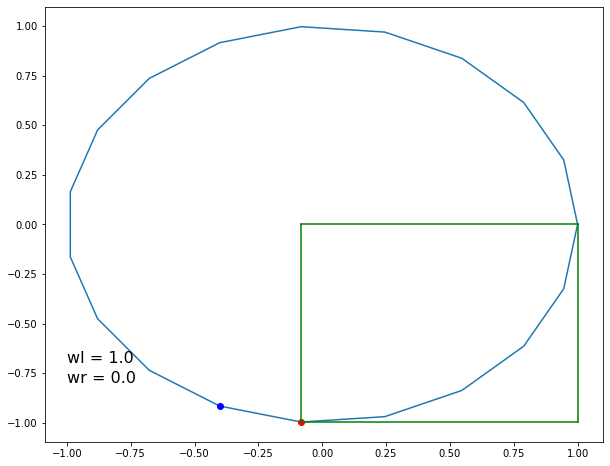

In [36]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x27s,y27s,'bo')
plt.plot(x27e,y27e,'ro')

plt.plot(xleft27,yleft27,'g')
plt.plot(xright27,yright27,'g')
plt.plot(xtop27,ytop27,'g')
plt.plot(xbot27,ybot27,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ16',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [37]:
x29s,y29s,x29e,y29e,x30s,y30s,x30e,y30e,wl,wr,lon29,lon30 = Strip_Tree(x[14:len(x)],y[14:len(x)])
xleft29,yleft29,xright29,yright29,xtop29,ytop29,xbot29,ybot29 = rectangulo(x30s,x30e,y30s+wl,y30s-wr) 

wl:  0.9694002659393303
wr:  0.0


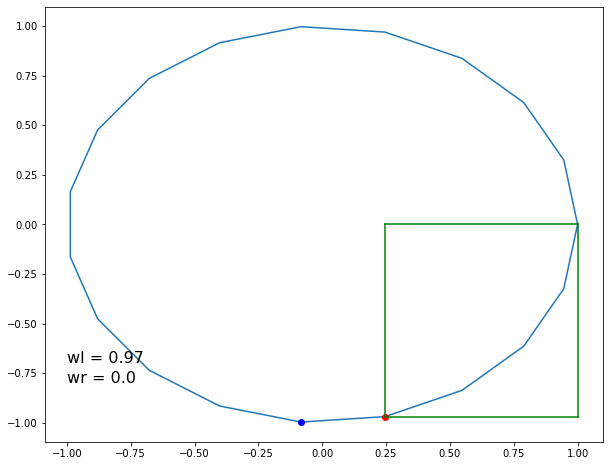

In [38]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x29s,y29s,'bo')
plt.plot(x29e,y29e,'ro')

plt.plot(xleft29,yleft29,'g')
plt.plot(xright29,yright29,'g')
plt.plot(xtop29,ytop29,'g')
plt.plot(xbot29,ybot29,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ17',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [39]:
x31s,y31s,x31e,y31e,x32s,y32s,x32e,y32e,wl,wr,lon31,lon32 = Strip_Tree(x[15:len(x)],y[15:len(x)])
xleft31,yleft31,xright31,yright31,xtop31,ytop31,xbot31,ybot31 = rectangulo(x32s,x32e,y32s+wl,y32s-wr) 

wl:  0.8371664782625285
wr:  0.0


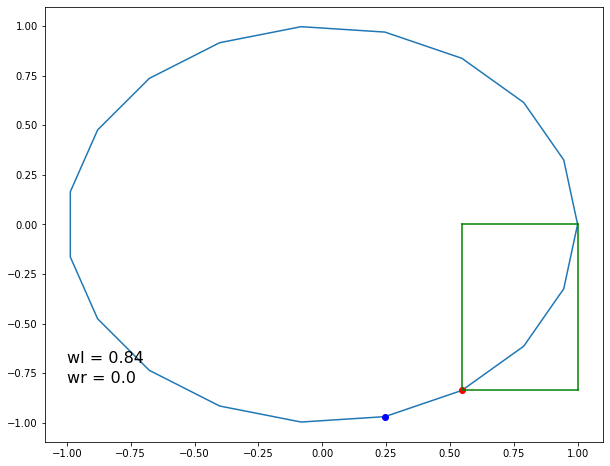

In [40]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x31s,y31s,'bo')
plt.plot(x31e,y31e,'ro')

plt.plot(xleft31,yleft31,'g')
plt.plot(xright31,yright31,'g')
plt.plot(xtop31,ytop31,'g')
plt.plot(xbot31,ybot31,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ18',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

In [41]:
x33s,y33s,x33e,y33e,x34s,y34s,x34e,y34e,wl,wr,lon33,lon34 = Strip_Tree(x[16:len(x)],y[16:len(x)])
xleft33,yleft33,xright33,yright33,xtop33,ytop33,xbot33,ybot33 = rectangulo(x34s,x34e,y34s+wl,y34s-wr) 

wl:  0.6142127126896678
wr:  0.0


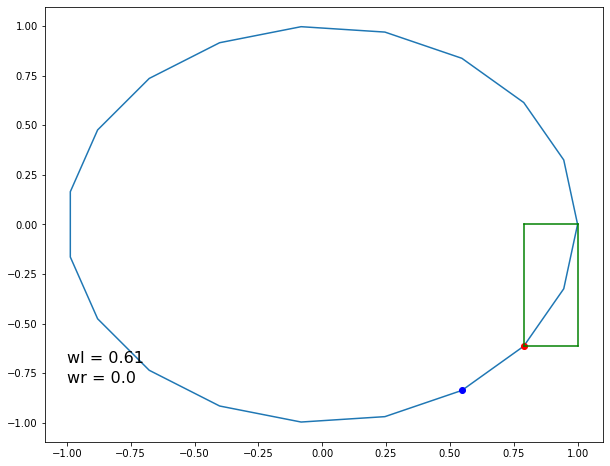

In [42]:
fig,ax = plt.subplots(1,figsize=(10,8))
plt.plot(x,y)
plt.plot(x33s,y33s,'bo')
plt.plot(x33e,y33e,'ro')

plt.plot(xleft33,yleft33,'g')
plt.plot(xright33,yright33,'g')
plt.plot(xtop33,ytop33,'g')
plt.plot(xbot33,ybot33,'g')

wl_title = 'wl = ' + str(np.round(wl,2))
wr_title = 'wr = ' + str(np.round(wr,2))

plt.text(-1,-0.7,wl_title, fontsize=16)
plt.text(-1,-0.8,wr_title, fontsize=16)

plt.savefig('../fig/Strip_Tree/circ19',transparent = False,bbox_inches ='tight',pad_inches = 0.4)

## Circunferencia
### Os comprimentos que serão considerados apenas são os ímpares, são os comprimentos que serão encontrados no filho esquerdo do Strip Tree, pois possuem a melhor resolução e o ultimo filho da izquerda.

In [43]:
longitude = lon1+lon3+lon5+lon7+lon9+lon11+lon13+lon15+lon17+lon19+lon21+lon23+lon25+lon27+lon29+lon31+lon33+lon34
longitude

6.245615007954318